### To adjust for the influence of prior popularity of names, min-max normalization method is used

#### * First step is getting the rate of a name in a given year. Rate = # of name of interest / # of all names in a given year. This can help to remove the bias due to different baseline (Populations in different years are different).  
#### * Second step is normalizing the rate. Normalized Rate =  [rate - min(rate)] / [max(rate) - min(rate)]. This can make sure all name rates are in the same scale and thus they can be compared with each other. 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams.update({'font.size': 20})

In [2]:
# load data
movie_df = pd.read_csv('data/movie_data_final.csv', encoding='latin-1')
bb_names_df = pd.read_csv('data/NationalNames.csv')

In [44]:
# get total numbers of each name each year for all time
total_num = bb_names_df.groupby('Year').agg({'Count': 'sum'}).reset_index()
# change column 'Count' into 'Total'
total_num.columns = ['Year', 'Total']

In [202]:
def plot_names_by_movie(title):
    
    if (not movie_df['Title'].str.contains(title).any()):
        
        print('This movie is not in the top 100 successful movies')
        
    else:
    
        # get the year when the movie was released

        release_year = movie_df[movie_df['Title']==title].Year.unique()[0]

        # set the time window to be 10 years before and after the movie is released

        current_year = datetime.now().year
        year_lower_limit = release_year - 10 if release_year - 10 > 1927 else 1927   # since the first movie on the list was released in 1937
        year_upper_limit = release_year + 10 if release_year + 10 < current_year else current_year

        # get the list of character names 

        character_list = movie_df[movie_df['Title']==title].Character_Name.unique()

        # calculate rates of interested names in a given year
        # count_list contains counts of interested names for all time, the counts for male and female sharing same names are combined
        # rate_list contains a new column 'Rate' 
        # this step will help to remove the bias due to differences in populations in different years

        count_list = bb_names_df[(bb_names_df['Name'].isin(character_list))&((bb_names_df['Year']>year_lower_limit))&((bb_names_df['Year']<year_upper_limit))][['Name','Year','Count']].groupby(['Year','Name']).agg({'Count': 'sum'}).reset_index()    
        rate_list = pd.merge(count_list, total_num, on='Year', how='inner')
        rate_list['Rate'] = rate_list['Count']/rate_list['Total']
        rate_list = rate_list[['Year','Name','Rate']]

        # normalize name rates using min-max normalization method
        # maximum and minmum rates for each name in all time are calculated
        # normalized rates are calculated by [rate - min(rate)]/[max(rate) - min(rate)]
        # this step can make sure all name rates are in the same scale and thus they can be compared with each other. 

        max_rates = rate_list.sort_values(by='Rate', ascending=False).groupby('Name').first().reset_index()[['Name','Rate']]
        max_rates.columns = ['Name','Max_Rate']
        min_rates = rate_list.sort_values(by='Rate', ascending=False).groupby('Name').last().reset_index()[['Name','Rate']]
        min_rates.columns = ['Name','Min_Rate']
        norm_rate_list = pd.merge(pd.merge(rate_list,max_rates,how='inner',on=['Name']),min_rates,how='inner',on=['Name'])
        norm_rate_list['Norm_Rate'] = (norm_rate_list['Rate']-norm_rate_list['Min_Rate'])/(norm_rate_list['Max_Rate']-norm_rate_list['Min_Rate'])

        # plot
        norm_rate_list.pivot(index='Year', columns='Name', values='Norm_Rate').plot(title=title+', '+str(release_year),fontsize=20).axvline(release_year, color='black', linewidth=2)


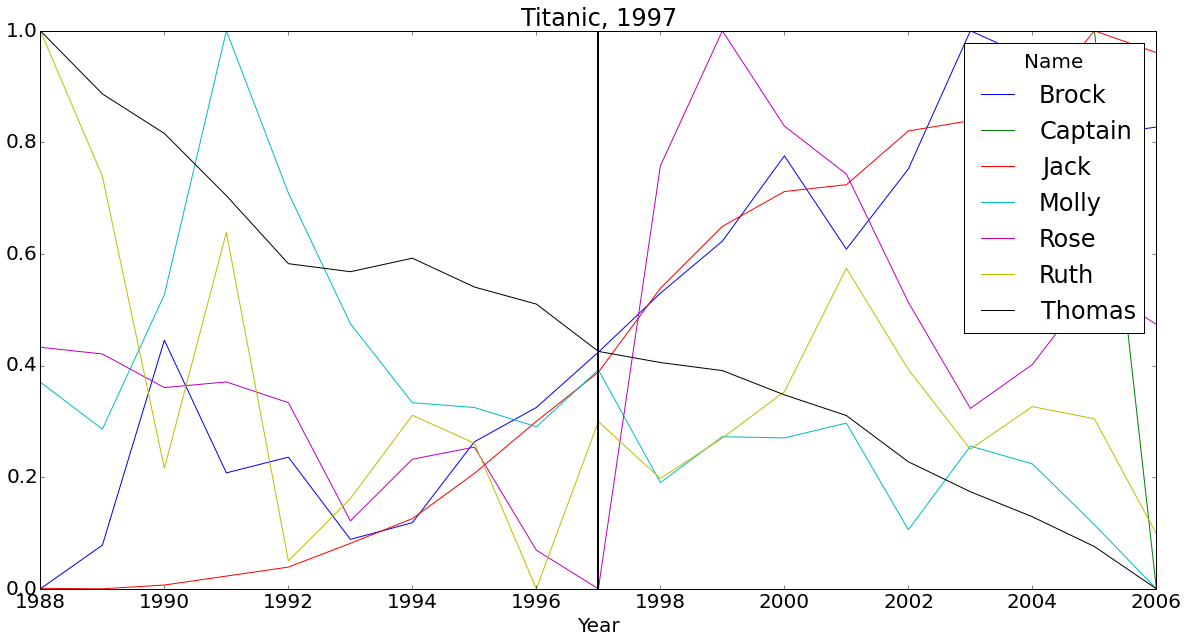

In [159]:
plot_names_by_movie('Titanic')

## "Molly" and "Ruth" spiked in 1997 when "Titanic" was released. 

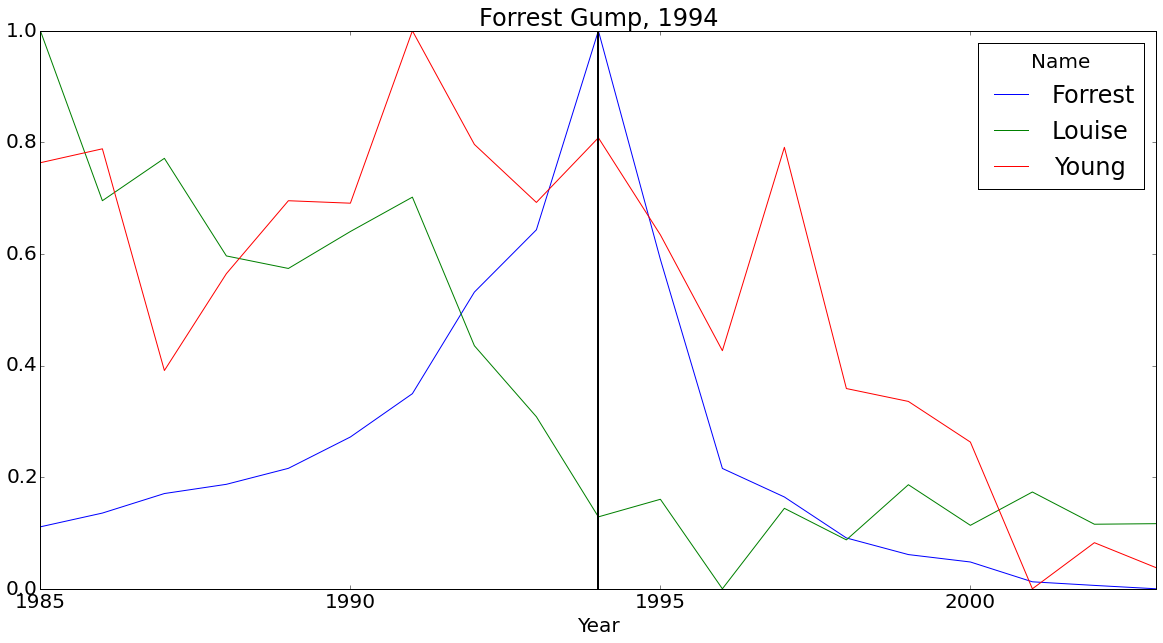

In [160]:
plot_names_by_movie('Forrest Gump')

## "Forrest" and "Young" spiked in 1994 when "Forrest Gump" was released.

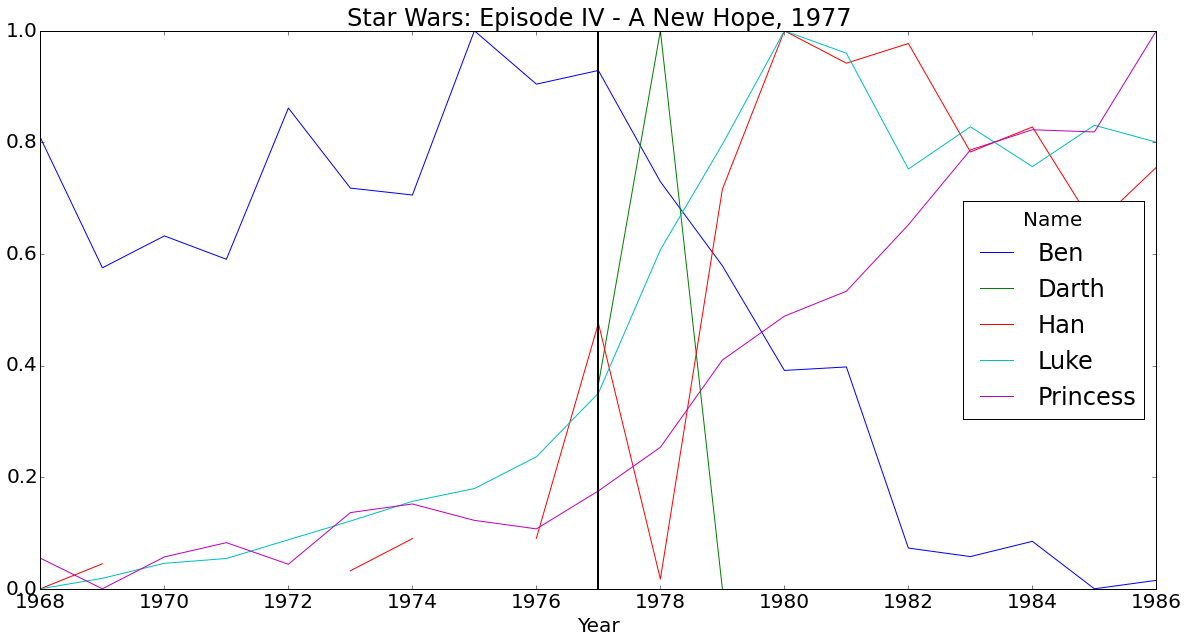

In [161]:
plot_names_by_movie('Star Wars: Episode IV - A New Hope')  # 1977

## "Han" spiked in 1977

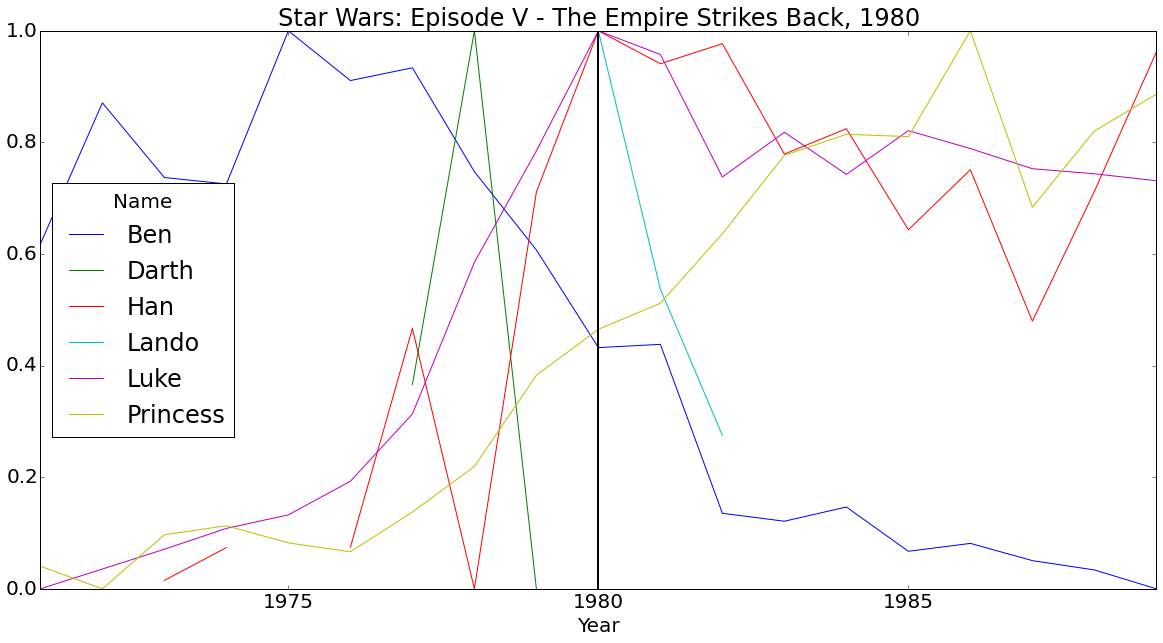

In [162]:
plot_names_by_movie('Star Wars: Episode V - The Empire Strikes Back')  # 1980

## "Luke" and "Han" spiked in 1980

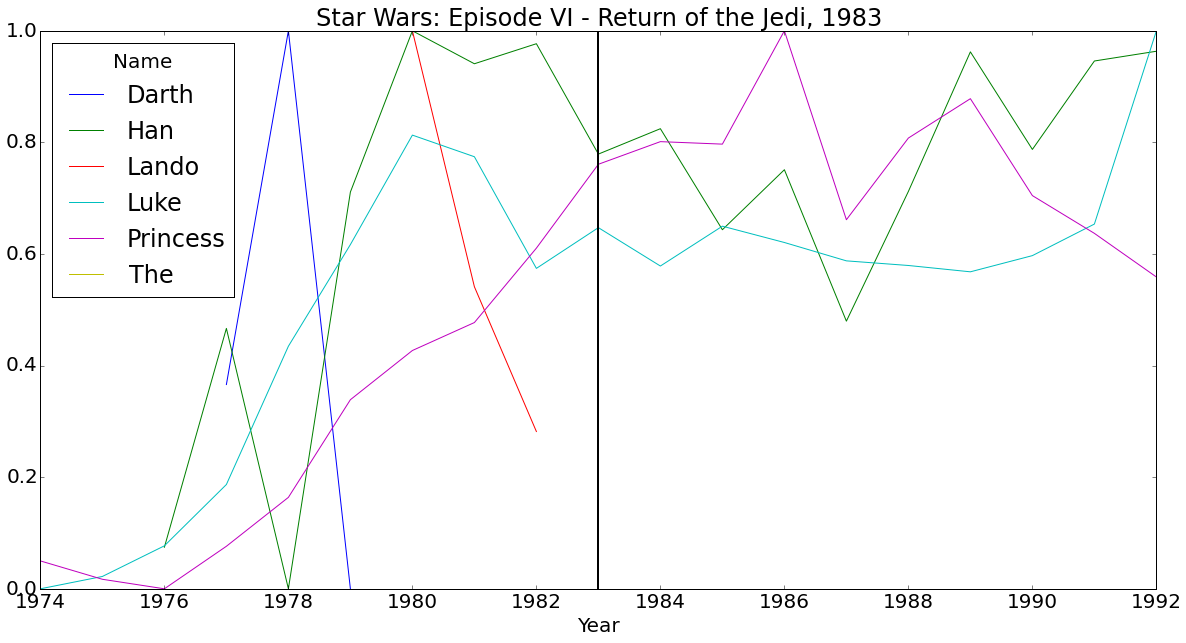

In [163]:
plot_names_by_movie('Star Wars: Episode VI - Return of the Jedi')  # 1983

## "Luke" spiked in 1983

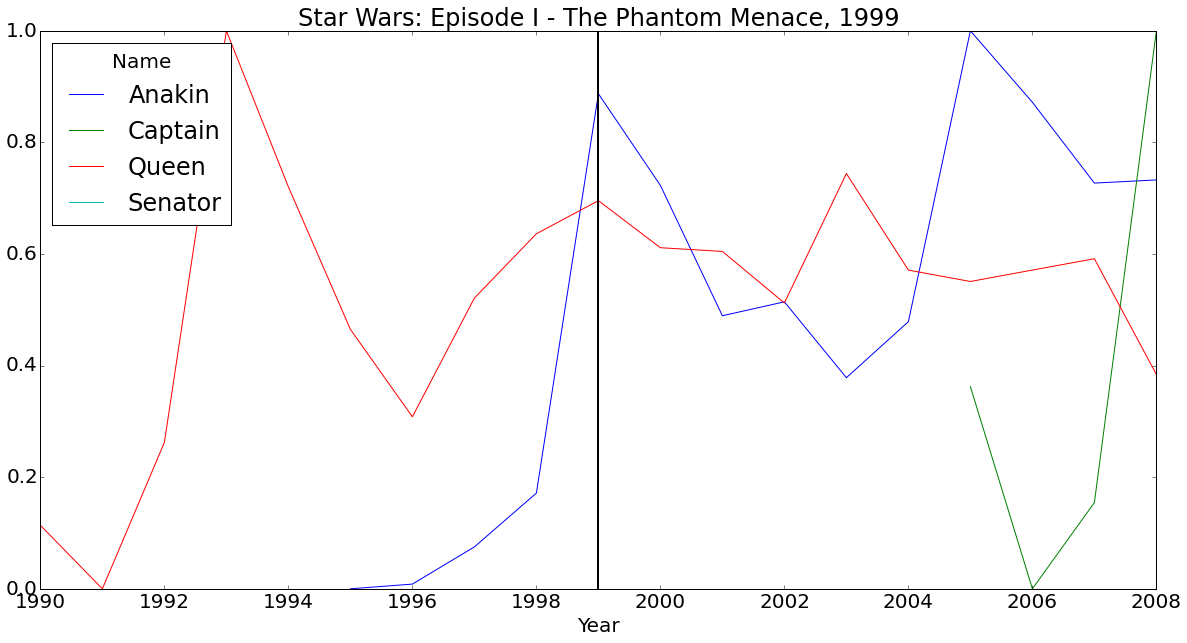

In [164]:
plot_names_by_movie('Star Wars: Episode I - The Phantom Menace')  # 1999

## "Anakin" spiked in 1999

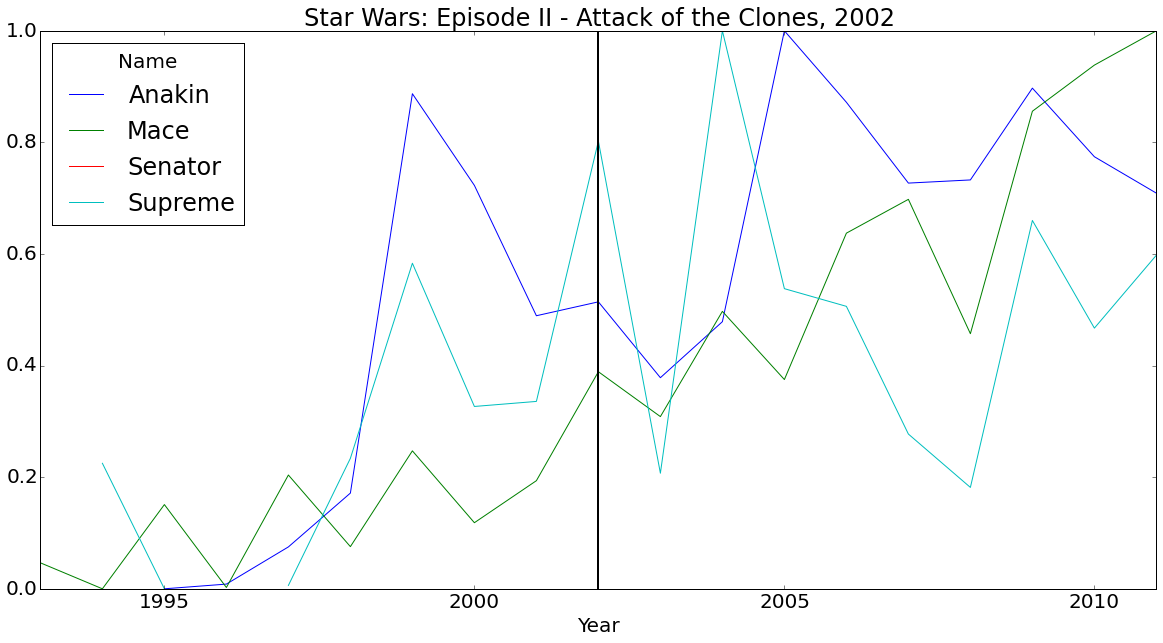

In [165]:
plot_names_by_movie('Star Wars: Episode II - Attack of the Clones')  # 2002

## It's interesting that "Supreme" spiked in 2002 and "Mace" spiked too. 

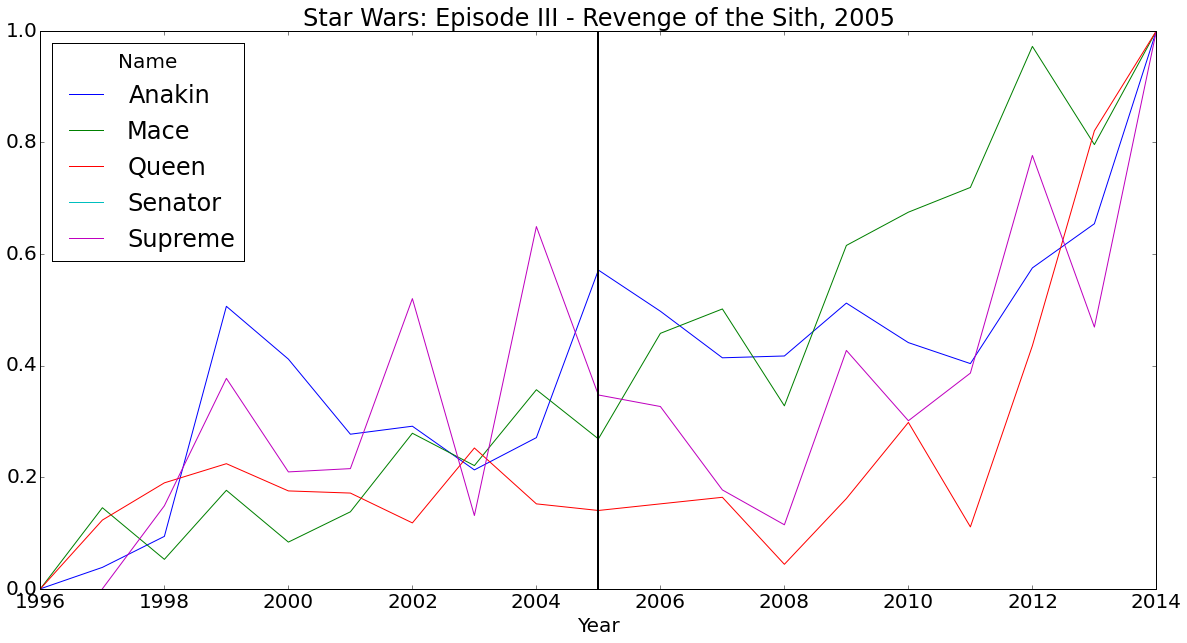

In [166]:
plot_names_by_movie('Star Wars: Episode III - Revenge of the Sith')  # 2005

## "Anakin" spiked again in 2005

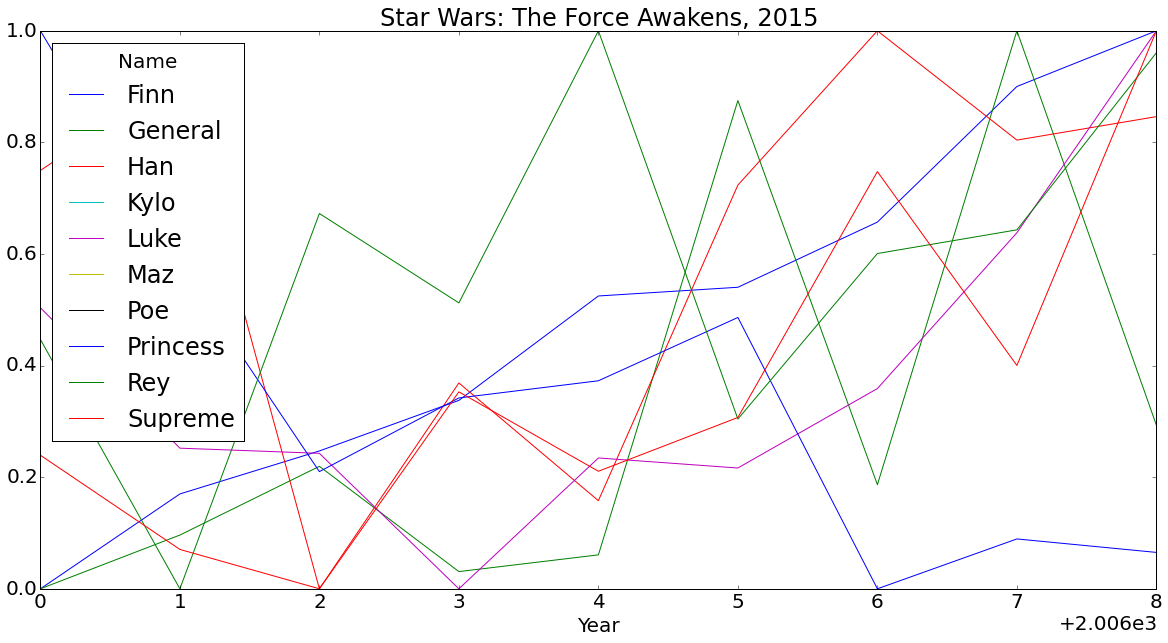

In [174]:
plot_names_by_movie('Star Wars: The Force Awakens')  # 2015

## There is no measaureable effect yet since this movie was just released